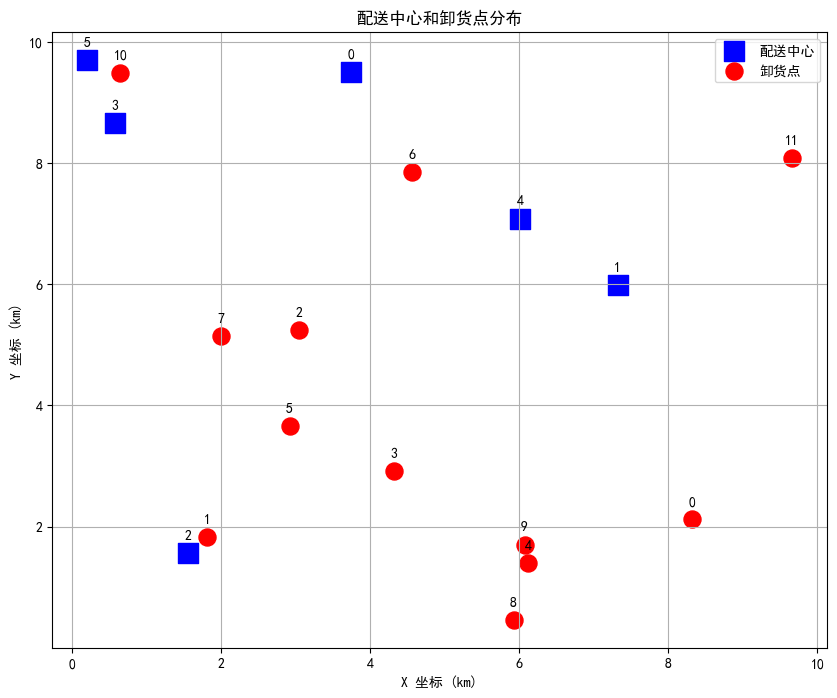

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 设定随机种子以确保结果可重复
np.random.seed(42)

# 生成6个配送中心的坐标 (x, y)
delivery_centers = np.random.uniform(0, 10, (6, 2))

# 生成12个配送点的坐标 (x, y)
drop_off_points = np.random.uniform(0, 10, (12, 2))

# 创建数据表格
centers_df_cn = pd.DataFrame(delivery_centers, columns=['X 坐标 (km)', 'Y 坐标 (km)'])
centers_df_cn.index.name = '配送中心 ID'
drop_off_df_cn = pd.DataFrame(drop_off_points, columns=['X 坐标 (km)', 'Y 坐标 (km)'])
drop_off_df_cn.index.name = '卸货点 ID'

# 正常显示中文
plt.rcParams['font.sans-serif'] = ['SimHei']
# 绘制图形
plt.figure(figsize=(10, 8))
plt.scatter(centers_df_cn['X 坐标 (km)'], centers_df_cn['Y 坐标 (km)'], color='blue', label='配送中心', marker='s', s=200)
plt.scatter(drop_off_df_cn['X 坐标 (km)'], drop_off_df_cn['Y 坐标 (km)'], color='red', label='卸货点', marker='o', s=150)
for i, txt in enumerate(centers_df_cn.index):
    plt.annotate(txt, (centers_df_cn['X 坐标 (km)'][i], centers_df_cn['Y 坐标 (km)'][i]), textcoords="offset points", xytext=(0, 10), ha='center')
for i, txt in enumerate(drop_off_df_cn.index):
    plt.annotate(txt, (drop_off_df_cn['X 坐标 (km)'][i], drop_off_df_cn['Y 坐标 (km)'][i]), textcoords="offset points", xytext=(0, 10), ha='center')
plt.xlabel('X 坐标 (km)')
plt.ylabel('Y 坐标 (km)')
plt.title('配送中心和卸货点分布')
plt.legend()
plt.grid(True)
plt.show()

In [2]:
drop_off_df_cn

,X 坐标 (km),Y 坐标 (km)
卸货点 ID,,
0,8.324426,2.123391
1,1.818250,1.834045
2,3.042422,5.247564
3,4.319450,2.912291
4,6.118529,1.394939
5,2.921446,3.663618
6,4.560700,7.851760
7,1.996738,5.142344
8,5.924146,0.464504


In [3]:
centers_df_cn

,X 坐标 (km),Y 坐标 (km)
配送中心 ID,,
0,3.745401,9.507143
1,7.319939,5.986585
2,1.560186,1.559945
3,0.580836,8.661761
4,6.011150,7.080726
5,0.205845,9.699099


In [4]:
import random
import datetime

# 设定一天的时间范围
start_time = datetime.datetime(2024, 6, 19, 0, 0, 0)
end_time = datetime.datetime(2024, 6, 19, 23, 59, 59)

# 每隔180分钟生成订单
time_interval = datetime.timedelta(minutes=180)

# 订单优先级及其对应的截止配送时间（小时）
priority_levels = {
    "一般": 3,
    "较紧急": 1.5,
    "紧急": 0.5
}

orders = []

current_time = start_time
while current_time <= end_time:
    for drop_off_id in range(len(drop_off_points)):
        # 随机生成m个订单
        m = random.randint(0, 10)
        for _ in range(m):
            # 随机选择配送中心ID
            delivery_center_id = random.choice(range(len(delivery_centers)))
            # 随机选择优先级
            priority = random.choice(list(priority_levels.keys()))
            # 计算截止配送时间
            deadline = current_time + datetime.timedelta(hours=priority_levels[priority])
            # 生成订单
            order = {
                "配送中心ID": delivery_center_id,
                "卸货点ID": drop_off_id,
                "优先级": priority,
                "订单生成时间": current_time,
                "截止配送时间": deadline
            }
            orders.append(order)
    current_time += time_interval

# 转换为DataFrame并显示
orders_df = pd.DataFrame(orders)
orders_df


,配送中心ID,卸货点ID,优先级,订单生成时间,截止配送时间
0,3,0,紧急,2024-06-19 00:00:00,2024-06-19 00:30:00
1,5,0,紧急,2024-06-19 00:00:00,2024-06-19 00:30:00
2,3,0,一般,2024-06-19 00:00:00,2024-06-19 03:00:00
3,1,2,一般,2024-06-19 00:00:00,2024-06-19 03:00:00
4,2,3,较紧急,2024-06-19 00:00:00,2024-06-19 01:30:00
...,...,...,...,...,...
439,3,11,一般,2024-06-19 21:00:00,2024-06-20 00:00:00
440,0,11,较紧急,2024-06-19 21:00:00,2024-06-19 22:30:00
441,5,11,较紧急,2024-06-19 21:00:00,2024-06-19 22:30:00
442,5,11,紧急,2024-06-19 21:00:00,2024-06-19 21:30:00


In [5]:
# 完整代码

import numpy as np
import pandas as pd
import random
import datetime

# 设定随机种子以确保结果可重复
np.random.seed(42)

# 生成6个配送中心的坐标 (x, y)
delivery_centers = np.random.uniform(0, 10, (6, 2))

# 生成12个卸货点的坐标 (x, y)
drop_off_points = np.random.uniform(0, 10, (12, 2))

# 订单优先级及其对应的截止配送时间（小时）
priority_levels = {
    "一般": 3,
    "较紧急": 1.5,
    "紧急": 0.5
}

# 设定一天的时间范围
start_time = datetime.datetime(2024, 6, 19, 0, 0, 0)
end_time = datetime.datetime(2024, 6, 19, 23, 59, 59)

# 每隔180分钟生成订单
time_interval = datetime.timedelta(minutes=180)

# 生成订单的函数
def generate_orders(delivery_centers, drop_off_points, start_time, end_time, time_interval, priority_levels):
    orders = []
    current_time = start_time
    while current_time <= end_time:
        for drop_off_id in range(len(drop_off_points)):
            # 随机生成m个订单
            m = random.randint(0, 10)
            for _ in range(m):
                # 随机选择配送中心ID
                delivery_center_id = random.choice(range(len(delivery_centers)))
                # 随机选择优先级
                priority = random.choice(list(priority_levels.keys()))
                # 计算截止配送时间
                deadline = current_time + datetime.timedelta(hours=priority_levels[priority])
                # 生成订单
                order = {
                    "配送中心ID": delivery_center_id,
                    "卸货点ID": drop_off_id,
                    "优先级": priority,
                    "订单生成时间": current_time,
                    "截止配送时间": deadline,
                    "数量": random.randint(1, 10)  # 随机生成每个订单的物品数量
                }
                orders.append(order)
        current_time += time_interval
    return pd.DataFrame(orders)

# 计算两点之间的欧氏距离
def calculate_distance(point1, point2):
    return np.linalg.norm(point1 - point2)

# 路径规划函数（考虑路径聚合和路线合并）
def improved_plan_delivery_routes(orders, delivery_centers, drop_off_points, max_items_per_drone=5, max_distance=20):
    # 使用贪婪算法生成初始路径
    routes = []
    for index, order in orders.iterrows():
        delivery_center = delivery_centers[order['配送中心ID']]
        drop_off_point = drop_off_points[order['卸货点ID']]
        distance_to_drop_off = calculate_distance(delivery_center, drop_off_point)
        
        # 如果距离超过最大距离，无法完成配送
        if distance_to_drop_off > max_distance:
            continue
        
        # 计算需要几架无人机来完成订单
        num_drones = (order['数量'] + max_items_per_drone - 1) // max_items_per_drone
        
        # 计算每架无人机的路径
        for drone_id in range(num_drones):
            # 简单贪婪算法：选择距离最近的卸货点
            drone_route = [delivery_center, drop_off_point, delivery_center]
            routes.append(drone_route)
    
    # 路线聚合和路线合并
    aggregated_routes = aggregate_routes(routes)
    merged_routes = merge_routes(aggregated_routes, max_distance, max_items_per_drone)
    
    # 生成最终的路径详细信息
    final_routes = []
    for route in merged_routes:
        route_details = []
        for i in range(len(route) - 1):
            start_point = route[i]
            end_point = route[i + 1]
            delivery_center_id = find_nearest_delivery_center(start_point, delivery_centers)
            drop_off_id = find_nearest_drop_off(end_point, drop_off_points)
            route_details.append({
                "起始点": start_point,
                "终点": end_point,
                "配送中心ID": delivery_center_id,
                "卸货点ID": drop_off_id
            })
        final_routes.append(route_details)
    
    return final_routes

# 路线聚合函数（按起始点聚合）
def aggregate_routes(routes):
    aggregated_routes = {}
    for route in routes:
        start_point = tuple(route[0])
        end_point = tuple(route[-2])  # 倒数第二个是卸货点，倒数第一个是起始点
        if (start_point, end_point) not in aggregated_routes:
            aggregated_routes[(start_point, end_point)] = []
        aggregated_routes[(start_point, end_point)].append(route)
    
    return aggregated_routes

# 路线合并函数（基于距离和载重考虑）
def merge_routes(aggregated_routes, max_distance, max_items_per_drone):
    merged_routes = []
    for key in aggregated_routes:
        start_point, end_point = key
        routes = aggregated_routes[key]
        
        total_distance = sum(calculate_distance(route[0], route[-2]) for route in routes)
        total_items = sum(len(route) - 2 for route in routes)  # 总共的物品数量
        
        if total_distance <= max_distance and total_items <= len(routes) * max_items_per_drone:
            merged_route = []
            for route in routes:
                merged_route.extend(route[1:-1])  # 不包括起始点和终点
            merged_route.insert(0, routes[0][0])  # 添加起始点
            merged_route.append(routes[-1][-2])  # 添加终点
            merged_routes.append(merged_route)
        else:
            merged_routes.extend(routes)  # 无法合并，保留原路线
    
    return merged_routes

# 找到最近的配送中心
def find_nearest_delivery_center(point, delivery_centers):
    min_distance = np.inf
    closest_center_id = None
    for i, center in enumerate(delivery_centers):
        distance = calculate_distance(point, center)
        if distance < min_distance:
            min_distance = distance
            closest_center_id = i
    return closest_center_id

# 找到最近的卸货点
def find_nearest_drop_off(point, drop_off_points):
    min_distance = np.inf
    closest_drop_off_id = None
    for i, drop_off in enumerate(drop_off_points):
        distance = calculate_distance(point, drop_off)
        if distance < min_distance:
            min_distance = distance
            closest_drop_off_id = i
    return closest_drop_off_id

# 生成订单
orders_df = generate_orders(delivery_centers, drop_off_points, start_time, end_time, time_interval, priority_levels)

# 执行路径规划
final_routes = improved_plan_delivery_routes(orders_df, delivery_centers, drop_off_points)

# 输出结果
for i, route in enumerate(final_routes):
    print(f"路径{i + 1}:")
    for step in route:
        print(f"    起始点: {step['起始点']}, 终点: {step['终点']}, 配送中心ID: {step['配送中心ID']}, 卸货点ID: {step['卸货点ID']}")


路径1:
    起始点: [7.31993942 5.98658484], 终点: [8.32442641 2.12339111], 配送中心ID: 1, 卸货点ID: 0
    起始点: [8.32442641 2.12339111], 终点: [7.31993942 5.98658484], 配送中心ID: 1, 卸货点ID: 11
路径2:
    起始点: [7.31993942 5.98658484], 终点: [8.32442641 2.12339111], 配送中心ID: 1, 卸货点ID: 0
    起始点: [8.32442641 2.12339111], 终点: [7.31993942 5.98658484], 配送中心ID: 1, 卸货点ID: 11
路径3:
    起始点: [7.31993942 5.98658484], 终点: [8.32442641 2.12339111], 配送中心ID: 1, 卸货点ID: 0
    起始点: [8.32442641 2.12339111], 终点: [7.31993942 5.98658484], 配送中心ID: 1, 卸货点ID: 11
路径4:
    起始点: [7.31993942 5.98658484], 终点: [8.32442641 2.12339111], 配送中心ID: 1, 卸货点ID: 0
    起始点: [8.32442641 2.12339111], 终点: [7.31993942 5.98658484], 配送中心ID: 1, 卸货点ID: 11
路径5:
    起始点: [7.31993942 5.98658484], 终点: [8.32442641 2.12339111], 配送中心ID: 1, 卸货点ID: 0
    起始点: [8.32442641 2.12339111], 终点: [7.31993942 5.98658484], 配送中心ID: 1, 卸货点ID: 11
路径6:
    起始点: [7.31993942 5.98658484], 终点: [8.32442641 2.12339111], 配送中心ID: 1, 卸货点ID: 0
    起始点: [8.32442641 2.12339111], 终点: [7.31993942 5.